In [1]:
# 準備事項

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np, ast
from skimage import data
from skimage.feature import Cascade
def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()
def show_image(image, title='Image', cmap_type='gray', interpolation=None):
    plt.imshow(image, cmap=cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def plot_comparision(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(32,8), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    #crop_face(result, detected)
    plt.show()    
    

def getFaceRectangle(d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face
    face= group_image[ x:width, y:height]
    return face   


def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] =  gaussian_image
    return original

# 
# Detect the faces in the image using the detector, set the minimum size of the searching window to 10 by 10 pixels.
# Go through each detected face with a for loop.
# Apply a gaussian filter to detect and blur faces, using a sigma of 8.

# 練習
## Help Sally restore her graduation photo
You are going to combine all the knowledge you acquired throughout the course to complete a final challenge: reconstructing a very damaged photo.

Help Sally restore her favorite portrait which was damaged by noise, distortion, and missing information due to a breach in her laptop.

Sally damaged picture
Sally's damaged portrait is already loaded as damaged_image.
You will be fixing the problems of this image by:

Rotating it to be uprightusing rotate()
Applying noise reduction with denoise_tv_chambolle()
Reconstructing the damaged parts with inpaint_biharmonic() from the inpaint module.
show_image() is already preloaded.

![image.png](attachment:image.png)

(667, 667, 3)


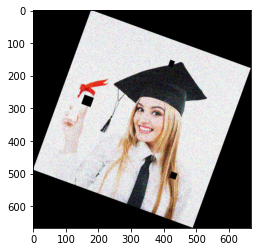

In [2]:
# 準備事項
from skimage.transform import rotate

def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

damaged_image = plt.imread('damaged_image.jpg')
print(damaged_image.shape)
plt.imshow(damaged_image)
plt.show()
# Import the necessary module to apply restoration on the image.
# Rotate the image by calling the function rotate().
# Use the chambolle algorithm to remove the noise from the image.
# With the mask provided, use the biharmonic method to restore the missing parts of the image and obtain the final image.

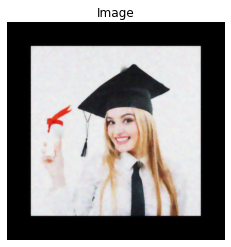

In [3]:
# Import the necessary modules
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

# Transform the image so it's not rotated
upright_img = rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1, multichannel=True)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)

show_image(result)

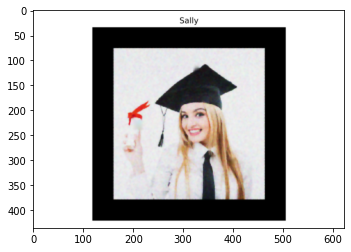

In [ ]:
# 預計結果
plt.imshow(plt.imread('restoration_denoise_Sally.png'))
plt.show()